In [1]:
NAME = "AMANJOT KANDHOLA"
COLLABORATORS = ""

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_
    
    1. Females were most likely to survive according to analysis on Sex attribute.
    2. 1st class passengers were most likely to survive according to Pclass analysis.
    3. Younger passengers were more likely to survive according to analysis on Age.
    4. Passengers who paid Very High and High Fares were most likely to survive according to analysis on Fare.
    5. Females belonging to Pclass 1 and Pclass 2 were twice likely to survive than 3rd class females or males of any class. Least likely to survive are 2nd and 3rd class males

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.
    
    1. List of attributes used:'Survived', 'Pclass', 'Sex',  'Age', 'SibSp', Parch','Fare', 'Embarked'.
    2. We could have used Name to find out any Titles from the names. But I am not taking titles into account. Similarly I am not taking Ticket to analyze it as it also has alphanumeric elements.
    3. I ignored Cabin as it had lot of null values which even if filled with some Unknown wont have much impact on relationship
    4. PassengerId is not taken into account as I already made it index
    5. According to me, Fare cant determine the survival although it can be useful if we want to see if less fare ticket people are not having access to lifeboats and couldnt survive


**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.
    
    1. I handled missing values in Age, Cabin, and Embarked.
    2. I created New Features such as Family Size: Combine SibSp and Parch to create a new feature FamilySize.
    3. Fare Binning: Categorize fare into discrete bins.
    4. Age Binning: Categorize age into discrete bins.
        To give deeper understanding of passengers survival based on their age or Fare

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.

    1. I filled missing values in Age with median of Age and missing values in Embarked as mode of Embarked attribute.
    2. Fare had some zero values which shouldnt be there as every ticket should have value > 0 so those Zero values in this also got replaced by mean

# Steps that I followed:
   1. Loading the train data into dataframe.
   2. Inspecting dataframe for dirty data, any missing values, whether to replace them or ignore them, studying the statistics such as count, average, min and max for attributes.
   3. Feature engineering. I did that to make Family Size from SibSp, Parch columns, and Binning age and fare for better analysis.
   4. Analysis on all attributes and finding relationships if any
   

# Data Loading

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Inspection and Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 passengers in the dataset, 177 missing values in **Age**, 2 missing values in **Embarked**, 687 missing values in **Cabin**.

### From this we can infer:

1. **Total Count** = 891 in all columns
    
2. **Missing values** in Age and Embarked columns can be imputed
    
3. **Cabin column** has almost 77% missing values which implies that it will add no value to our result. So, it can be dropped.


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
d_frame = pd.DataFrame(data.dtypes) # Putting datatypes in dataframe so that we can analyze if they have missing values
d_frame['MissingCounts'] = data.isnull().sum() # Counting missing values
d_frame.rename(columns={0:'DataType'}, inplace = True) # renaming column name which was assigned 0 by default to DataType
d_frame


,DataType,MissingCounts
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


It confirms the missing value counts for Age, Cabin and Embarked

In [6]:
# I want to understand the levels each attribute has. For example Pclass has 1,2,3 and so on for other attributes
d_frame['Counts'] = data.nunique()
d_frame

,DataType,MissingCounts,Counts
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


From this, we get that PassengerId has 891 different values. Survived has 2 different values: survived or not and so on.

In [7]:
(data['Fare']==0).sum() 

15

There are 15 values in Fare which has zero as value.
We can replace those with mean value in Fare column


In [8]:
data[data['Fare']==0].index # Index where Fare is zero

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [9]:
#I want to use fillna() so , first I will replace zero with na and then using fillna , I will replace na with mean
data['Fare']= data['Fare'].replace(0,np.NaN)

In [10]:
(data['Fare']==0).sum()  # It is zero as now all 0s are NaNs

0

In [11]:
data['Fare'].isnull().sum() # Those 0s are now nulls

15

In [12]:
data['Fare'].fillna(data['Fare'].mean(), inplace = True)

In [13]:
data['Fare'].isnull().sum() # No Nulls now

0

In [14]:
# We can see that dataframe has PassengerId with similar values in index column as well. So we can use PassengerId itself as index.

data= data.set_index('PassengerId')
data
#data.set_index('PassengerId', inplace=True)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
# Attributes of dataset
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Finding number of survivors 
df = data['Survived'].value_counts()
df
# Total 891 passengers are in the dataset, 342 survived and 549 did not.

0    549
1    342
Name: Survived, dtype: int64

In [17]:
# Filling missing values for Age
data['Age'].fillna(data['Age'].median(), inplace = True)
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [18]:
data['Age'].isnull().sum() # No nulls

0

In [19]:
# Filling values for Embarked 
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True) 
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [20]:
data['Embarked'].isnull().sum() # No nulls 

0

In [21]:
data.info()
# We can see Age and Embarked has no missing values now but cabin still has and as it wont add any value we, can drop it

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [22]:
data = data.drop('Cabin', axis=1)  # Cabin dropped

In [23]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [24]:
#Further, as SibSp and Parch denoting Siblings, spouse, parent and children can all be considered under one attribute 'Family' 
#and we can try to find the relationship between survival and number of family members in family

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [25]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.755650,1.904602
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.514222,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.100000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,32.755650,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


I am concentrating on Fare and Age in these to understand their statistics. 

    Minimum Age is 0.42 which means the youngest passenger on board is 0.4 yrs old
    Maximum Age is 80.00 which means the oldest passenger is 80 yrs old
    25% is 22 which means 25% of passengers have age < 22
    50 % is 28 which means 50% of passengers have age < 28
    75% is 35 which means 75% of passengers have age < 35

    Similarly Fare attribute is studied with Maximum Fare = 512 and Minimum Fare = 4
    25% of passengers have fare < 7.9
    50% of passengers have fare < 15
    75% of passengers have fare < 33

# Analysis
to understand impact of various attributes on survival of passenger

Out of all attributes, we can see effect on survival of passenger according to :

1. **Pclass**( Ticket class)
2. **Sex** ( which gender passenger belong to)
3. **FamilySize**( number of family members)
4. **Embarked**
5. **Age**
6. **Fare**

In [26]:
# Survival according to Pclass
survival_Pclass = data.groupby('Pclass')['Survived'].mean()
survival_Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [27]:
data.groupby(['Pclass'])[['Survived']].agg(['count','mean']) 

Survived          
          count      mean
Pclass                   
1           216  0.629630
2           184  0.472826
3           491  0.242363

From this we can infer that :

1. Maximum passengers were from 3rd Class making up more than 50 % of passengers(total 890)
2. Number of passengers in 1st class is greater than 2nd class

Important one here is the analysis on mean survival rate according to Pclass:
   
   **Passengers in the first class has highest survival rate : 63%** 
    meaning they likely had better access to lifeboats and safety measures, because of being close to the decks and given more priority and attentive service.
    
   **Survival rate for third-class passengers was markedly lower than that for the other classes : 24%** 
    Factors causing this could include more remote cabin locations, due to which it might have been harder to reach lifeboats

In [28]:
# Survival according to Sex
survival_Sex = data.groupby('Sex')['Survived'].mean()
survival_Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

74% of females on board survived.
19% of males on board survived.

Higher Survival Rate for Females maybe because  women and children were given priority during lifeboat with mentality of  "women and children first."


In [29]:
# Survival according to FamilySize
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [30]:
survival_Family = data.groupby('FamilySize')['Survived'].mean()
survival_Alone = data.groupby('IsAlone')['Survived'].mean()
survival_Family , survival_Alone

(FamilySize
 1     0.303538
 2     0.552795
 3     0.578431
 4     0.724138
 5     0.200000
 6     0.136364
 7     0.333333
 8     0.000000
 11    0.000000
 Name: Survived, dtype: float64,
 IsAlone
 0    0.505650
 1    0.303538
 Name: Survived, dtype: float64)

Passengers traveling alone or with one family member might have had a higher survival rate due to easier mobility and quicker access to lifeboats.

But there are certain points where this analysis is misleading as in IsAlone it is prefering less number of family members for better chance at survival, but in FamilySize, for size of 4 it is giving 72% chance of survival.

Therefore we will ignore the effect of family on survival here

In [31]:
# Survival according to Age
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 85], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

#bins=[0, 12, 18, 35, 60, 100] specifies the edges of the bins.
#labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'] specifies the labels for each bin.

In [32]:
data.groupby('AgeBin')[['Survived']].mean()

# Higher Survival Rates for Children: younger passengers were more likely to survive.
# Lower Survival Rates for Seniors

,Survived
AgeBin,
Child,0.579710
Teenager,0.428571
Young Adult,0.353271
Adult,0.400000
Senior,0.227273


In [33]:
# Survival according to Fare
data['FareBin'] = pd.qcut(data['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
#This code divides the Fare data into 4 bins (quartiles).
#labels=False means the bins are labeled with integers (0, 1, 2, 3) instead of bin ranges.

In [34]:
data.groupby(['FareBin'])[['Survived']].mean()

,Survived
FareBin,
Low,0.225664
Medium,0.281818
High,0.440678
Very High,0.598086


Passengers who paid Very High and High Fares are most likely to survive as they must had better access to lifeboats or given priority during evacualtion

While passengers with medium and low had low chances of survival as they must be at very low level decks and reaching to life boats would have been difficult

In [35]:
data.groupby(['Sex', 'Pclass'])[['Survived']].mean()


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [36]:
data.groupby(['Sex', 'Pclass'])[['Survived']].agg(['count','mean'])

Survived          
                 count      mean
Sex    Pclass                   
female 1            94  0.968085
       2            76  0.921053
       3           144  0.500000
male   1           122  0.368852
       2           108  0.157407
       3           347  0.135447

Females belonging to Pclass 1 and Pclass 2 were twice likely to survive than 3rd class females or males of any class.

Least likely to survive are 2nd and 3rd class males

Male count was maximum in 3rd class

In [37]:
# Survival according to Embarked
survival_Embarked = data.groupby('Embarked')['Survived'].mean()
survival_Embarked

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

   Highest Survival rate is of passengers embarked from **'C'** which is **55%**, followed by **'Q'** at **39%**, **'S'** at **34%**

In [38]:
# Maximum passengers embarked from 'S' (72% embarked from S, 19% from C, 9% from Q)
embarked_counts =data.groupby(['Embarked'])[['Survived']].agg(['count'])
total_survivor=embarked_counts['Survived'].sum()
embarked_counts['Percent'] = (embarked_counts['Survived']/total_survivor*100)
embarked_counts

,Survived,Percent
,count,
Embarked,,
C,168,18.855219
Q,77,8.641975
S,646,72.502806


In [39]:
data.groupby(['Embarked','Sex'])[['Survived']].agg(['count','mean'])

Survived          
                   count      mean
Embarked Sex                      
C        female       73  0.876712
         male         95  0.305263
Q        female       36  0.750000
         male         41  0.073171
S        female      205  0.692683
         male        441  0.174603

1. Passengers embarked from Southampton were mostly males and 2 times of females. That could be a reason for survival rate for 'S' to be lower approx 34%
2. Survival Rate of Females is highest in 'C' Pclass1
3. Survival rates of Males were 30% in 'C' , 7% in 'Q' compared to expected 17% in 'S'

In [40]:
data.groupby(['Embarked','Pclass'])[['Survived']].agg(['count','mean'])

Survived          
                   count      mean
Embarked Pclass                   
C        1            85  0.694118
         2            17  0.529412
         3            66  0.378788
Q        1             2  0.500000
         2             3  0.666667
         3            72  0.375000
S        1           129  0.589147
         2           164  0.463415
         3           353  0.189802

Passengers in first class (Pclass = 1) generally had higher survival rates compared to those in second (Pclass = 2) and third class (Pclass = 3) across all ports of embarkation.

Passengers embarking from Cherbourg generally had better survival rates compared to those from Southampton and Queenstown

In [41]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,AgeBin,FareBin
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Young Adult,Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Adult,Very High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Young Adult,Low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Young Adult,Very High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Young Adult,Medium
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1,1,Young Adult,Medium
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,1,Adult,Very High
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,0,Child,High
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,3,0,Young Adult,Medium


In [42]:
# we can drop SibSp and Parch as we already created FamilySize using them

## Summary of Findings:
    1. Out of 891 passengers who boarded Titanic, 38% of them survived while majority approx 62% didnt survive.
    2. Age, Embarked and Cabin had missing values. 
    I replaced Age' missing values with the mean; Embarked's missing value with mode. 
    3. Cabin got dropped as it had 77% missing values and replacing those wont add any value to our findings.
    4. Fare had some zero values which shouldnt be there as every ticket should have value > 0 so those Zero values in this also got replaced by mean.
    5. Analysis on Survival based on Pclass determined 50 % of total passengers were from 3rd class. Additionally, Pclass 1 had highest survival rate.
    6. Analysis based on Sex determined Females were more likely to survive as 74% of females on board survived.
    7. Analysis based on Family Size couldnt determine any kind of relation.
    8. Analysis  based on Age suggested increase in chance of survival for younger people of age till teenager.
    9. Fare suggested Higher fare of tickets meant higher chance of survival.
    10. Embarked analysis suggested Highest Survival rate of passengers embarked from **'C'** which is **55%**.

In [47]:
Embarked_Analysis = pd.crosstab(data['Embarked'],data['Sex'],data['Survived'],aggfunc='count').round(1)
Embarked_Analysis

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,205,441


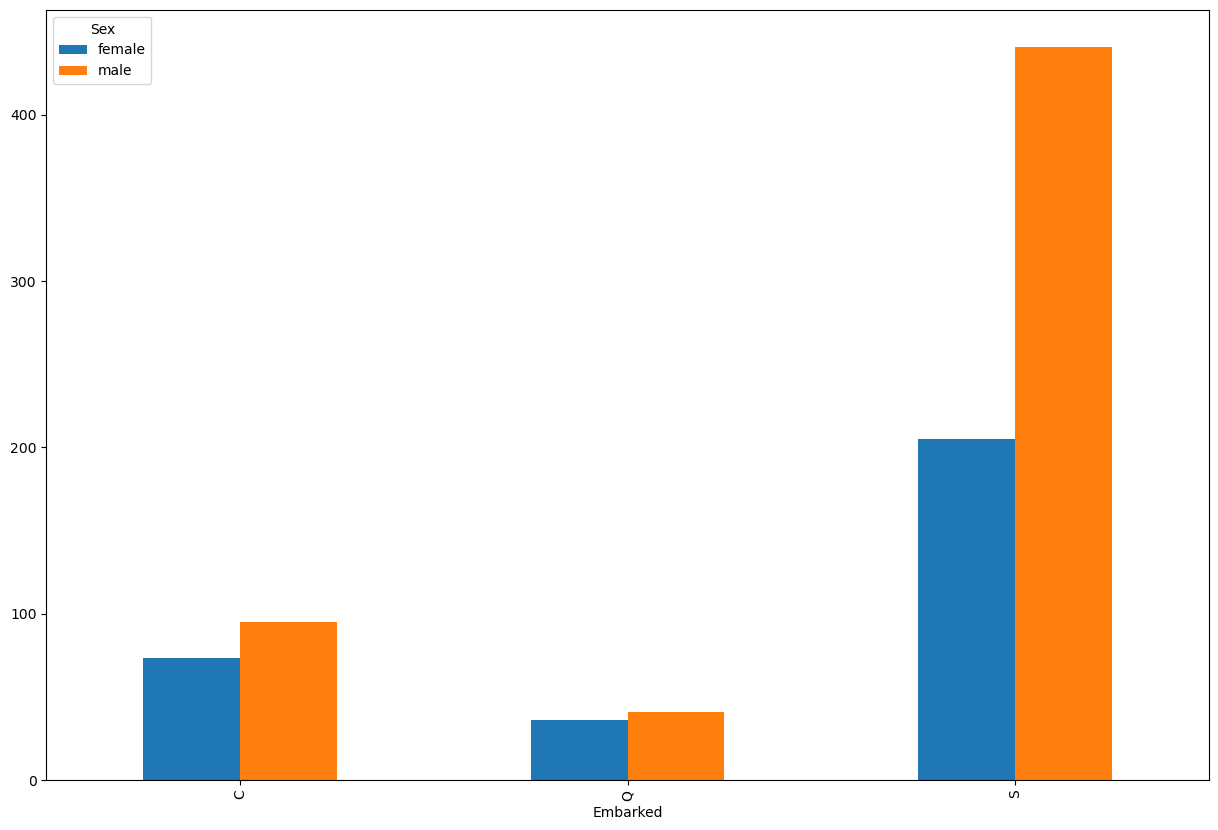

In [51]:
Embarked_Analysis.plot(kind='bar', figsize=(15,10)); #, stacked=True